# Oficina - Visualização de Dados - Aula 2.2

## Análise dados de vendas de videogames

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
games = pd.read_csv('vgsales.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 1 - Proporção de vendas globais por gênero da empresa "Nintendo":

>* __Gênero mais vendido__: Platform

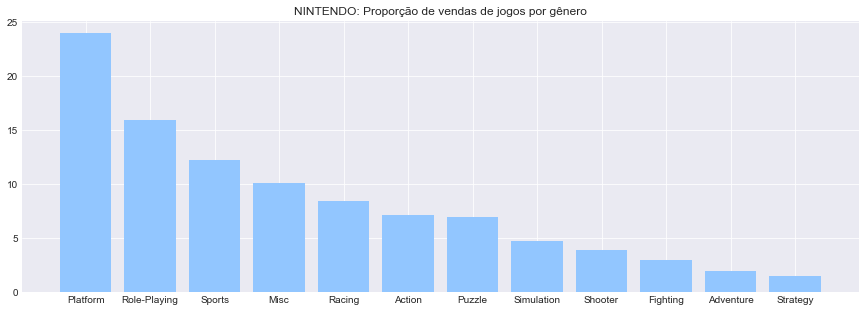

In [36]:
# Selecionando jogos da Nintendo e agrupando por gênero e somando
nintendo = games[games['Publisher'] == 'Nintendo'].groupby('Genre').sum()

# Ordenando de forma decrescente a quantidade de Vendas Globais
nintendo = nintendo.sort_values(by='Global_Sales', ascending=False)

# Calculando o vetor com as porcentagens
porcentagens = nintendo['Global_Sales']*100.0/nintendo['Global_Sales'].sum()

# Gerando o gráfico de barras
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.title('NINTENDO: Proporção de vendas de jogos por gênero')
plt.bar(nintendo.index,porcentagens)
plt.show()

## 2 - Proporção de quantidade de jogos por plataforma a partir de 2015:

> * __Plataforma com mais jogos__: PS4

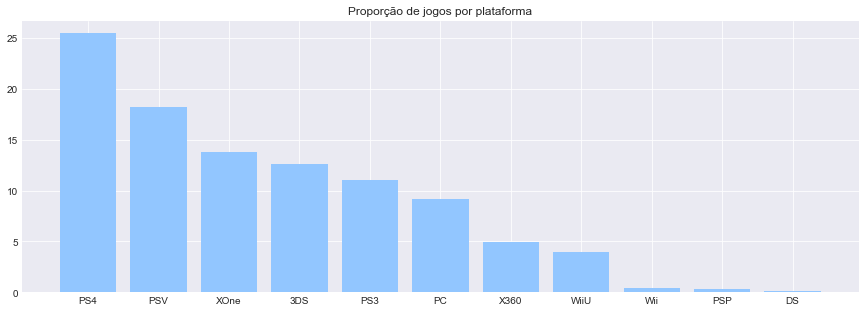

In [27]:
# Jogos à partir de 2015
ano2015 = games[games['Year'] >= 2015]

# Contando a quantidade de jogos por plataforma
contagem = ano2015.groupby(by='Platform').count()

# Organizando a quantidade de jogos em ordem decrescente
contagem = contagem.sort_values(by='Rank', ascending=False)

# Calculando a porcentagem (quantidade de cada plataforma *100 / soma da quantidade entre todas plataformas)
porcentagem = contagem['Rank']*100/contagem['Rank'].sum()

# Gerando o gráfico de barras
plt.figure(figsize=(15,5))
plt.style.use('seaborn-darkgrid')
plt.title('Proporção de jogos por plataforma')
plt.bar(contagem.index, porcentagem)
plt.show()